In [227]:
import numpy as np
#from scipy.linalg import cholesky
from numpy.linalg import cholesky
from matplotlib import pyplot as plt
import math

In [208]:
# hyper parameters
SET ={
    "alpha":[0.1,0.25,0.75,1,1.5],
    "beta":[0,0.5,1,2,5],
    "kappa":[0.1,0.5,1,5,10]
}   
    

In [225]:
# declare variables
P_0 = np.array([[1,0.3],[0.3,9]])
x_m = np.transpose(np.array([[2,1]]))
print(x_m)
print(P_0)

[[2]
 [1]]
[[1.  0.3]
 [0.3 9. ]]


In [235]:
def f(x):
    y = np.array([np.sin(x[0]),np.cos(x[1])])
    #y = np.array([x[0],x[1]])
    return y


def ut_get_weights(n,alpha,beta,kappa):
    # Compute the normal weights 
    _lambda = alpha ** 2 * (n + kappa) - n

    dummy = 1 / (2 * (n + _lambda))
    WM = np.ones((2*n+1,1))*dummy
    WC = np.ones((2*n+1,1))*dummy
    WM[0] = _lambda / (n + _lambda)
    WC[0] = _lambda / (n + _lambda) + (1 - alpha ** 2 + beta)
    c = n + _lambda 

    return WM,WC,c

def ut_get_sigmaPoints(M,P,c):
    #A = np.array(cholesky(P,lower=False)) #scipy
    A = np.array(cholesky(P))  #numpy
#    print(f"P_0 = \n{P}")
#    print(f"A = \n{A}")
#    print(f"A*A' = \n{A*A.T}")
    delta_X = np.concatenate((np.zeros_like(M), A, -1*A),axis=1)
    #print(delta_X)
    #print(delta_X.shape[1])
    #print(M)
    X_0 = np.tile(M,(1,delta_X.shape[1]))
    #print(f"X_0:\n{X_0}")
    X = np.sqrt(c)*delta_X + X_0
    return X


In [237]:

def plot_dist(axs,X,Y):
    axs[0].plot(X[0,:],X[1,:], marker='x',linestyle = 'None') 
    axs[1].plot(Y[0,:],Y[1,:], marker='x',linestyle = 'None')

In [229]:
def do_single_run(x_m,P_x,alpha,beta,kappa):
    # calculate sigma points
    n = x_m.ndim
    W = ut_get_weights(n,alpha,beta,kappa)
    WM = W[0]
    WC = W[1]
    c  = W[2]
    
    X = ut_get_sigmaPoints(x_m,P_x,c)    

    # nonlinear tranformation / propagation
    Y = np.zeros_like(X)
    for k in range(X.shape[1]):
        Y.T[k] = f(X.T[k])     
    return X,Y



---- Run 0
---- Run 1
---- Run 2
---- Run 3
---- Run 4


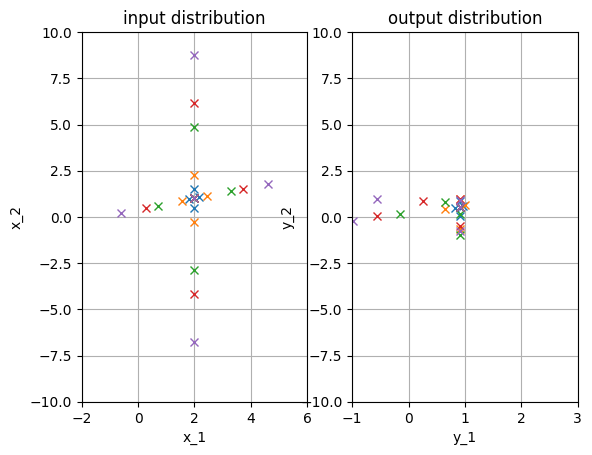

In [238]:
fig, axs = plt.subplots(1, 2)
ax=axs[0]
ax.set_title("input distribution")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_xlim([-2, 6])
ax.set_ylim([-10, 10])
ax.grid()
ax=axs[1]   
ax.set_title("output distribution")
ax.set_xlabel("y_1")
ax.set_ylabel("y_2")
ax.set_xlim([-1, 3])
ax.set_ylim([-10, 10])
ax.grid()

alpha = 1
beta  = 2
kappa = 1

id = 0
for id in range(len(SET["alpha"])):
    print(f"=================\n---- Run {id}")
    alpha = SET["alpha"][id]

    res = do_single_run(x_m,P_0,alpha,beta,kappa)
    X = res[0]
    Y = res[1]
    #print(f"X = \n{X}")
    #print(f"Y = \n{Y}")
    plot_dist(axs,X,Y)

In [214]:
z = np.array([[1,2,3]])
print(z.shape)



(1, 3)


In [215]:
%matplotlib inline
if False:
    x=np.arange(0,math.pi*2,0.05)
    y=np.sin(x)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.plot(x,y)
    ax.set_title("sine wave")
    ax.set_xlabel("angle")
    ax.set_ylabel("sine")

In [216]:
# Testing
if True:
    x = np.array([1,1]) #*math.pi
    print(x)
    y = f(x)
    print(y)


[1 1]
[0.84147098 0.54030231]
